## How to Approach Machine Learning Projects

![](https://i.imgur.com/kKdAALX.png)

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
6. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
7. Experiment and combine results from multiple strategies to get a better result.
8. Interpret models, study individual predictions, and present your findings. 

## Importing Libraries and Configurations

In [4]:
import os
import matplotlib
import opendatasets as od
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import joblib

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestRegressor

In [5]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

## Step 1 - Understand Business Requirements & Nature of Data

### Understanding the Big Picture

The first step in any machine learning problem is to read the given documentation, talk to various stakeholders and identify the following:

1. What is the business problem you're trying to solve using machine learning?
2. Why are we interested in solving this problem? What impact will it have on the business?
3. How is this problem solved currently, without any machine learning tools?
4. Who will use the results of this model, and how does it fit into other business processes?
5. How much historical data do we have, and how was it collected?
6. What features does the historical data contain? Does it contain the historical values for what we're trying to predict.
7. What are some known issues with the data (data entry errors, missing data, differences in units etc.)
8. Can we look at some sample rows from the dataset? How representative are they of the entire dataset.
9. Where is the data stored and how will you get access to it?
10. ...


Gather as much information about the problem as possible, so that you're clear understanding of the objective and feasibility of the project.

## Step 2 - Classify the problem as supervised/unsupervised & regression/classification

Here's the landscape of machine learning([source](https://medium.datadriveninvestor.com/machine-learning-in-10-minutes-354d83e5922e)):

<img src="https://miro.medium.com/max/842/1*tlQwBmbL6RkuuFq8OPJofw.png" width="640">



Here are the topics in machine learning that we're studying in this course ([source](https://vas3k.com/blog/machine_learning/)): 

<img src="https://i.imgur.com/VbVFAsg.png" width="640">



### Loss Functions and Evaluation Metrics

Once you have identified the type of problem you're solving, you need to pick an appropriate evaluation metric. Also, depending on the kind of model you train, your model will also use a loss/cost function to optimize during the training process.

* **Evaluation metrics** - they're used by humans to evaluate the ML model

* **Loss functions** - they're used by computers to optimize the ML model

They are often the same (e.g. RMSE for regression problems), but they can be different (e.g. Cross entropy and Accuracy for classification problems).

See this article for a survey of common loss functions and evaluation metrics: https://towardsdatascience.com/11-evaluation-metrics-data-scientists-should-be-familiar-with-lessons-from-a-high-rank-kagglers-8596f75e58a7

## Step 3 - Download, clean & explore the data and create new features

### Downloading Data

There may be different sources to get the data:

* CSV files
* SQL databases
* Raw File URLs
* Kaggle datasets 
* Google Drive
* Dropbox
* etc.

Identify the right tool/library to get the data.

In [14]:
os.listdir('Rossmann Retail Store Data')

['store.csv', 'test.csv', 'train.csv']

In [15]:
ross_df = pd.read_csv('./Rossmann Retail Store Data/train.csv', low_memory=False)

In [16]:
ross_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [17]:
store_df = pd.read_csv('./Rossmann Retail Store Data/store.csv')

In [18]:
store_df

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [19]:
merged_df = ross_df.merge(store_df, how='left', on='Store')
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


In [20]:
test_df = pd.read_csv('Rossmann Retail Store Data/test.csv')

In [21]:
merged_test_df = test_df.merge(store_df, how='left', on='Store') 

In [22]:
merged_test_df

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
41084,41085,1112,6,2015-08-01,1.0,0,0,0,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
41085,41086,1113,6,2015-08-01,1.0,0,0,0,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
41086,41087,1114,6,2015-08-01,1.0,0,0,0,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


### Cleaning Data

The first step is to check the column data types and identify if there are any null values.

In [24]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Store                      1017209 non-null  int64  
 1   DayOfWeek                  1017209 non-null  int64  
 2   Date                       1017209 non-null  object 
 3   Sales                      1017209 non-null  int64  
 4   Customers                  1017209 non-null  int64  
 5   Open                       1017209 non-null  int64  
 6   Promo                      1017209 non-null  int64  
 7   StateHoliday               1017209 non-null  object 
 8   SchoolHoliday              1017209 non-null  int64  
 9   StoreType                  1017209 non-null  object 
 10  Assortment                 1017209 non-null  object 
 11  CompetitionDistance        1014567 non-null  float64
 12  CompetitionOpenSinceMonth  693861 non-null   float64
 13  CompetitionO

In [25]:
round(merged_df.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Store,1017209.0,558.43,321.91,1.0,280.0,558.0,838.0,1115.0
DayOfWeek,1017209.0,4.00,2.00,1.0,2.0,4.0,6.0,7.0
Sales,1017209.0,5773.82,3849.93,0.0,3727.0,5744.0,7856.0,41551.0
Customers,1017209.0,633.15,464.41,0.0,405.0,609.0,837.0,7388.0
Open,1017209.0,0.83,0.38,0.0,1.0,1.0,1.0,1.0
Promo,1017209.0,0.38,0.49,0.0,0.0,0.0,1.0,1.0
SchoolHoliday,1017209.0,0.18,0.38,0.0,0.0,0.0,0.0,1.0
CompetitionDistance,1014567.0,5430.09,7715.32,20.0,710.0,2330.0,6890.0,75860.0
CompetitionOpenSinceMonth,693861.0,7.22,3.21,1.0,4.0,8.0,10.0,12.0
CompetitionOpenSinceYear,693861.0,2008.69,5.99,1900.0,2006.0,2010.0,2013.0,2015.0


In [26]:
merged_df.duplicated().sum()

0

In [27]:
merged_df['Date'] = pd.to_datetime(merged_df.Date)

In [28]:
merged_test_df['Date'] = pd.to_datetime(merged_test_df.Date)

In [29]:
merged_df.Date.min(), merged_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [30]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

### Exploratory Data Analysis and Visualization

Objectives of exploratory data analysis:

- Study the distributions of individual columns (uniform, normal, exponential)
- Detect anomalies or errors in the data (e.g. missing/incorrect values)
- Study the relationship of target column with other columns (linear, non-linear etc.)
- Gather insights about the problem and the dataset
- Come up with ideas for preprocessing and feature engineering



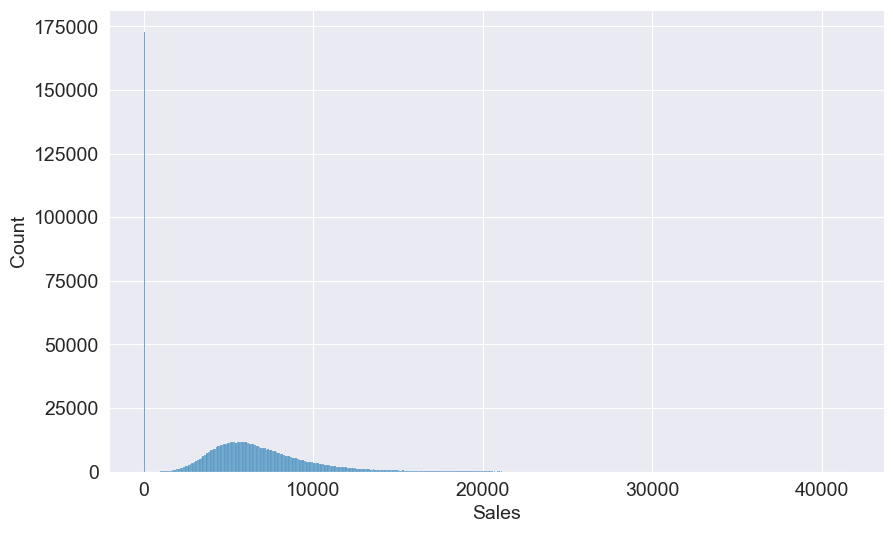

In [32]:
merged_plot = sns.histplot(data=merged_df, x='Sales')

In [33]:
merged_df.Open.value_counts()

Open
1    844392
0    172817
Name: count, dtype: int64

In [34]:
merged_df.Sales.value_counts()[0]

172871

In [35]:
merged_df = merged_df[merged_df.Open==1].copy()

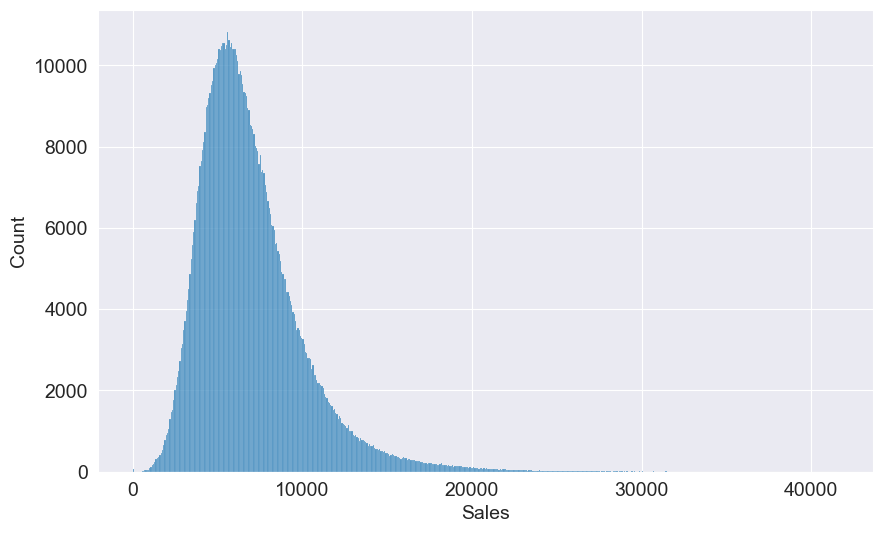

In [36]:
sns.histplot(data=merged_df, x='Sales');

In [37]:
merged_df

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,a,150.0,9.0,2006.0,0,NaN,NaN,NaN
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,b,860.0,10.0,1999.0,0,NaN,NaN,NaN
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,b,840.0,NaN,NaN,1,48.0,2012.0,"Jan,Apr,Jul,Oct"
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,b,1430.0,NaN,NaN,0,NaN,NaN,NaN


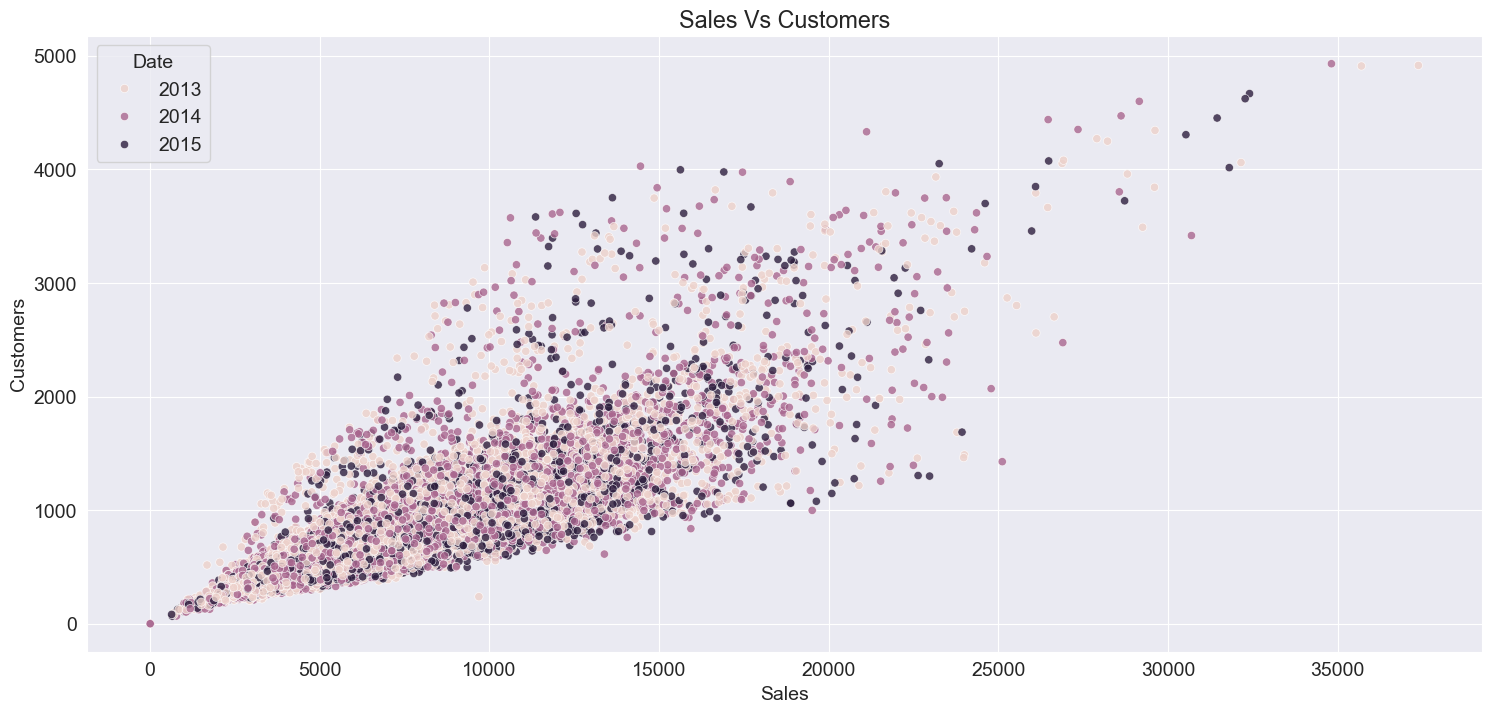

In [38]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(40000)
sns.scatterplot(x=temp_df.Sales, y=temp_df.Customers, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Sales Vs Customers")
plt.show()

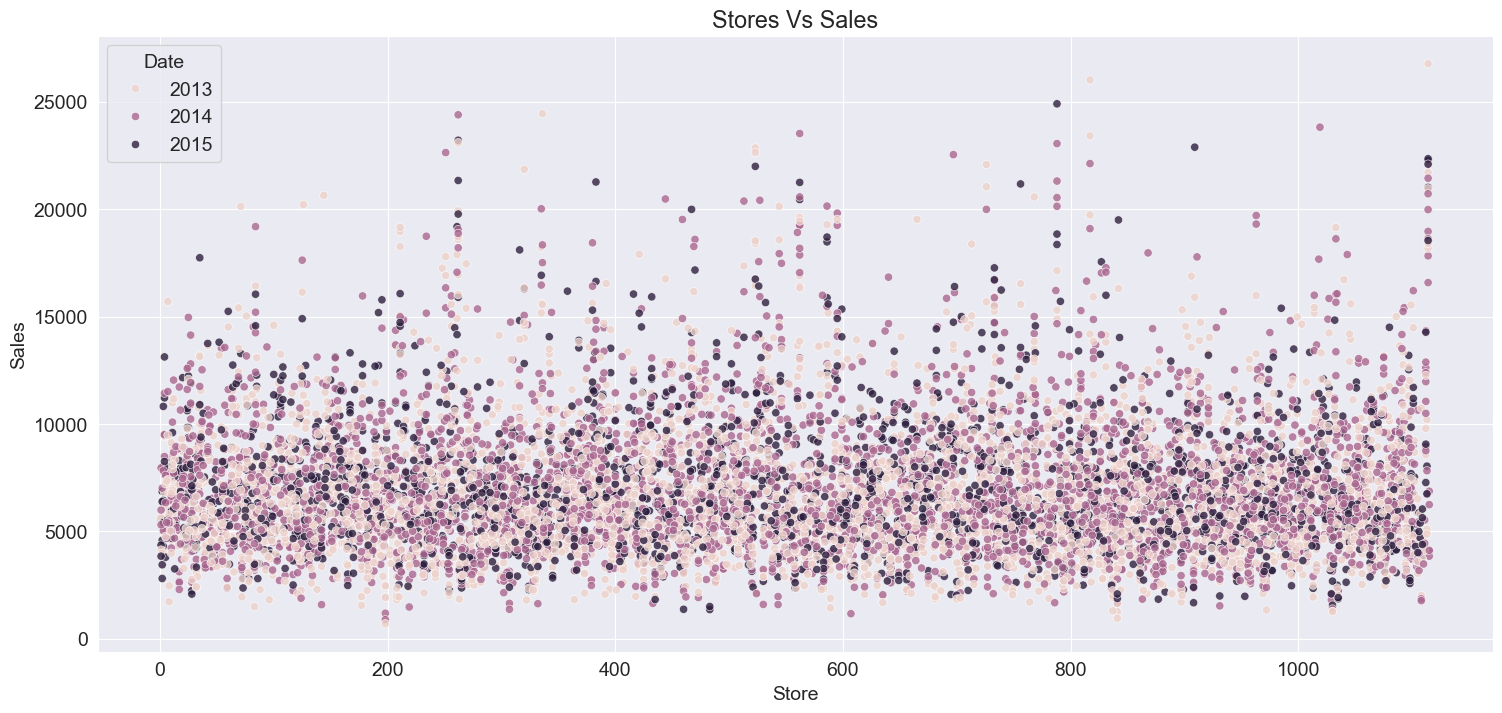

In [39]:
plt.figure(figsize=(18,8))
temp_df = merged_df.sample(10000)
sns.scatterplot(x=temp_df.Store, y=temp_df.Sales, hue=temp_df.Date.dt.year, alpha=0.8)
plt.title("Stores Vs Sales")
plt.show()

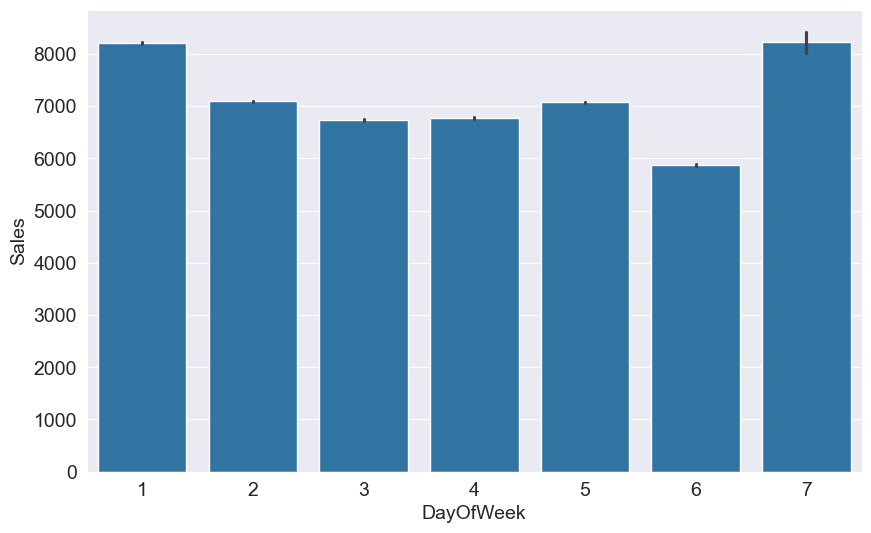

In [40]:
sns.barplot(data=merged_df, x='DayOfWeek', y='Sales');

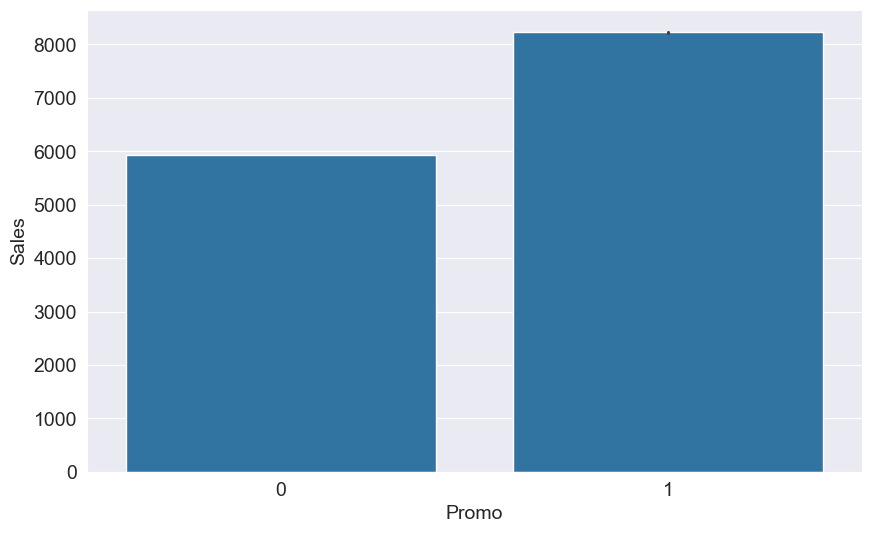

In [41]:
sns.barplot(data=merged_df, x='Promo', y='Sales');

In [42]:
merged_df.drop(columns=['StoreType','Assortment','StateHoliday', 'PromoInterval','Date']).corr()['Sales'].sort_values(ascending=False)

Sales                        1.000000
Customers                    0.823597
Promo                        0.368145
Promo2SinceWeek              0.095311
SchoolHoliday                0.038617
CompetitionOpenSinceYear     0.016101
Store                        0.007710
Promo2SinceYear             -0.034713
CompetitionDistance         -0.036396
CompetitionOpenSinceMonth   -0.043489
Promo2                      -0.127596
DayOfWeek                   -0.178736
Open                              NaN
Name: Sales, dtype: float64

### Feature Engineering

Feature engineer is the process of creating new features (columns) by transforming/combining existing features or by incorporating data from external sources. 


For example, here are some features that can be extracted from the "Date" column:

1. Day of week
2. Day or month
3. Month
4. Year
5. Weekend/Weekday
6. Month/Quarter End


In [44]:
merged_df['Day'] = merged_df.Date.dt.day
merged_df['Month'] = merged_df.Date.dt.month
merged_df['Year'] = merged_df.Date.dt.year

In [45]:
merged_test_df['Day'] = merged_test_df.Date.dt.day
merged_test_df['Month'] = merged_test_df.Date.dt.month
merged_test_df['Year'] = merged_test_df.Date.dt.year

<Axes: xlabel='Year', ylabel='Sales'>

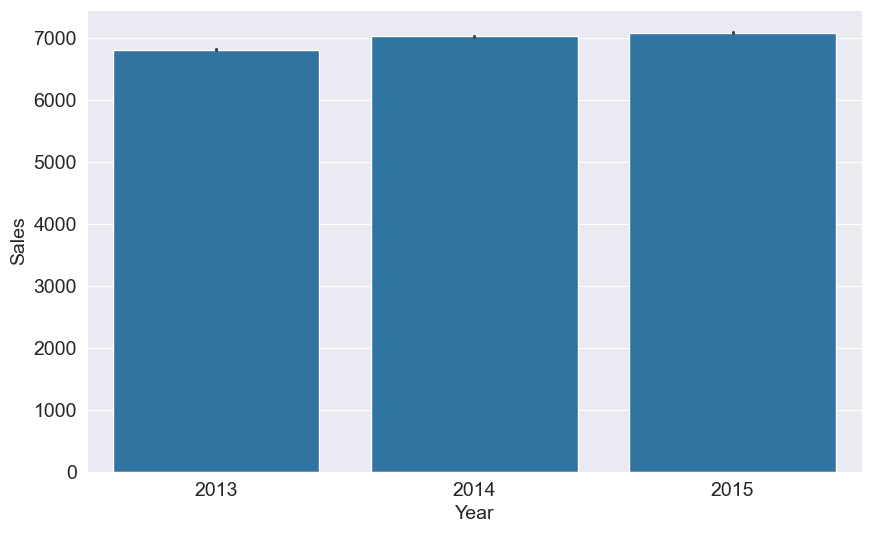

In [46]:
sns.barplot(data=merged_df, x='Year', y='Sales')

<Axes: xlabel='Month', ylabel='Sales'>

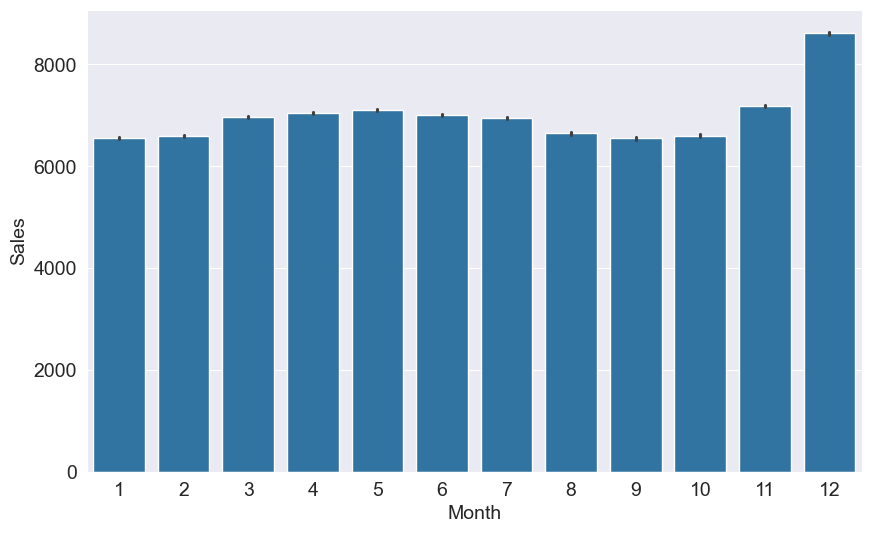

In [47]:
sns.barplot(data=merged_df, x='Month', y='Sales')

## Step 4 - Create a training/test/validation split and prepare the data for training

### Train/Test/Validation Split

The data already contains a test set, which contains over one month of data after the end of the training set. We can apply a similar strategy to create a validation set. We'll the last 25% of rows for the validation set, after ordering by date

In [50]:
len(merged_df)

844392

In [51]:
train_size = int(.75 * len(merged_df))
train_size

633294

In [52]:
sorted_df = merged_df.sort_values('Date')
train_df, val_df = sorted_df[:train_size], sorted_df[train_size:]

In [53]:
len(train_df), len(val_df)

(633294, 211098)

In [54]:
train_df.Date.min(), train_df.Date.max()

(Timestamp('2013-01-01 00:00:00'), Timestamp('2014-12-10 00:00:00'))

In [55]:
val_df.Date.min(), val_df.Date.max()

(Timestamp('2014-12-10 00:00:00'), Timestamp('2015-07-31 00:00:00'))

In [56]:
merged_test_df.Date.min(), merged_test_df.Date.max()

(Timestamp('2015-08-01 00:00:00'), Timestamp('2015-09-17 00:00:00'))

In [57]:
train_df.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval', 'Day', 'Month', 'Year'],
      dtype='object')

### Input and Target columns

Let's also identify input and target columns. Note that we can't use the no. of customers as an input, because this information isn't available beforehand. Also, we needn't use all the available columns, we can start out with just a small subset.

In [59]:
input_cols = ['Store', 'DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment', 'Day', 'Month', 'Year']

In [60]:
target_col = 'Sales'

In [61]:
merged_df[input_cols].nunique()

Store           1115
DayOfWeek          7
Promo              2
StateHoliday       4
StoreType          4
Assortment         3
Day               31
Month             12
Year               3
dtype: int64

In [62]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [63]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [64]:
test_inputs = merged_test_df[input_cols].copy()
# Test data does not have targets

In [65]:
numeric_cols = ['Store', 'Day', 'Month', 'Year']
categorical_cols = ['DayOfWeek', 'Promo', 'StateHoliday', 'StoreType', 'Assortment']

### Imputation, Scaling and Encode

Let's impute missing data from numeric columns and scale the values to the $(0, 1)$ range. 

In [67]:
imputer = SimpleImputer(strategy='mean').fit(merged_df[numeric_cols])

In [68]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [69]:
scaler = MinMaxScaler().fit(merged_df[numeric_cols])

In [70]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [72]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(merged_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))

In [74]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [75]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]
X_test = test_inputs[numeric_cols + encoded_cols]

In [76]:
pd.set_option('display.max_columns', 500)
X_train

,Store,Day,Month,Year,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7,Promo_0,Promo_1,StateHoliday_0,StateHoliday_a,StateHoliday_b,StateHoliday_c,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
1017190,0.983842,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016179,0.075404,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016353,0.231598,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1016356,0.234291,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1016368,0.245063,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256632,0.667864,0.3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
256642,0.677738,0.3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
256634,0.669659,0.3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
256633,0.668761,0.3,1.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## Step 5 - Create quick & easy baseline models to benchmark future models

A quick baseline model helps establish the minimum score any ML model you train should achieve.


### Fixed/Random Guess

Let's define a model that always returns the mean value of Sales as the prediction.

In [81]:
train_targets.mean()

6873.17964168301

In [83]:
def return_mean(inputs):
    return np.full(len(inputs), merged_df.Sales.mean())

In [86]:
train_preds = return_mean(X_train)

In [87]:
train_preds

array([6955.51429076, 6955.51429076, 6955.51429076, ..., 6955.51429076,
       6955.51429076, 6955.51429076])

Let's evaluate this to using the RMSE score.

In [91]:
mean_squared_error(train_preds, train_targets, squared=False)

3082.450443277419

In [93]:
mean_squared_error(return_mean(X_val), val_targets, squared=False)

3168.6033635047716

In [95]:
train_targets

1017190     5961
1016179     4220
1016353     6851
1016356    17267
1016368     3102
           ...  
256632      6897
256642     15736
256634      7444
256633      5207
256636      3587
Name: Sales, Length: 633294, dtype: int64

The model is off by about $3000 on average.

Let's try another model, which makes a random guess between the lowest and highest sale.

In [99]:
def guess_random(inputs):
    lo, hi = merged_df.Sales.min(), merged_df.Sales.max()
    return np.random.random(len(inputs)) * (hi - lo) + lo

In [177]:
train_preds = guess_random(X_train)
train_preds

array([36829.6881465 ,  3156.24553107,  3042.85343349, ...,
       35240.97258449, 17570.62576666, 36747.7301248 ])

In [179]:
mean_squared_error(train_preds, train_targets, squared=False)

18597.561033835496

In [181]:
mean_squared_error(guess_random(X_val), val_targets, squared=False)

18428.78986478194

Clearly, this model is much worse.

### Baseline ML model

Let's train a simple `LinearRegression` model, with no customization.

In [109]:
linreg = LinearRegression()

In [111]:
linreg.fit(X_train, train_targets)

LinearRegression()

`model.fit` uses the following workflow for training the model ([source](https://www.deepnetts.com/blog/from-basic-machine-learning-to-deep-learning-in-5-minutes.html)):

1. We initialize a model with random parameters (weights & biases).
2. We pass some inputs into the model to obtain predictions.
3. We compare the model's predictions with the actual targets using the loss function.  
4. We use an optimization technique (like least squares, gradient descent etc.) to reduce the loss by adjusting the weights & biases of the model
5. We repeat steps 1 to 4 till the predictions from the model are good enough.


<img src="https://www.deepnetts.com/blog/wp-content/uploads/2019/02/SupervisedLearning.png" width="480">


In [113]:
train_preds = linreg.predict(X_train)
train_preds

array([ 7138., 10606.,  7056., ...,  6248.,  6004.,  5632.])

In [114]:
train_targets

1017190     5961
1016179     4220
1016353     6851
1016356    17267
1016368     3102
           ...  
256632      6897
256642     15736
256634      7444
256633      5207
256636      3587
Name: Sales, Length: 633294, dtype: int64

In [115]:
mean_squared_error(train_preds, train_targets, squared=False)

2741.59820867194

In [117]:
val_preds = linreg.predict(X_val)
val_preds

array([5632., 5632., 6006., ..., 8648., 8404., 7840.])

In [118]:
mean_squared_error(val_preds, val_targets, squared=False)

2818.001666781425

Note that a simple linear regression model isn't much better than our fixed baseline model which always predicts the mean.

Based on the above baselines, we now know that any model we train should have ideally have a RMSE score lower than $2800. This baseline can also be conveyed to other stakeholders to get a sense of whether the range of loss makes sense. 

## Step 6 - Pick a strategy, train a model & tune hyperparameters

### Systematically Exploring Modeling Strategies

Scikit-learn offers the following cheatsheet to decide which model to pick.

![](https://scikit-learn.org/stable/_static/ml_map.png)


Here's the general strategy to follow:

- Find out which models are applicable to the problem you're solving.
- Train a basic version for each type of model that's applicable
- Identify the modeling approaches that work well and tune their hypeparameters
- [Use a spreadsheet](https://docs.google.com/spreadsheets/d/1S42lnklqdj4hS3BohffyvZVJOFBZJ61VDiHLMuf2zBw/edit?usp=sharing) to keep track of your experiments and results.

In [127]:
def try_model(model):
    model.fit(X_train, train_targets)
    
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_val)
    
    train_rmse = mean_squared_error(train_targets, train_preds, squared = False)
    val_rmse = mean_squared_error(val_targets, val_preds, squared = False)
    return train_rmse, val_rmse

### Linear Models

Read about linear models here: https://scikit-learn.org/stable/modules/linear_model.html

In [130]:
try_model(LinearRegression())

(2741.59820867194, 2818.001666781425)

In [131]:
try_model(Ridge())

(2741.587195081612, 2817.7786644988328)

In [132]:
try_model(Lasso())

(2741.7166125565204, 2818.3622512584957)

In [133]:
try_model(ElasticNet())

(2879.2020073360727, 2975.2711509707638)

In [134]:
try_model(SGDRegressor())

(2741.8365473235185, 2816.01037677552)

### Tree Based Models

* Decision trees: https://scikit-learn.org/stable/modules/tree.html
* Random forests and gradient boosting: https://scikit-learn.org/stable/modules/ensemble.html

In [137]:
tree = DecisionTreeRegressor(random_state=42)
try_model(tree)

(0.0, 1559.7378600480247)

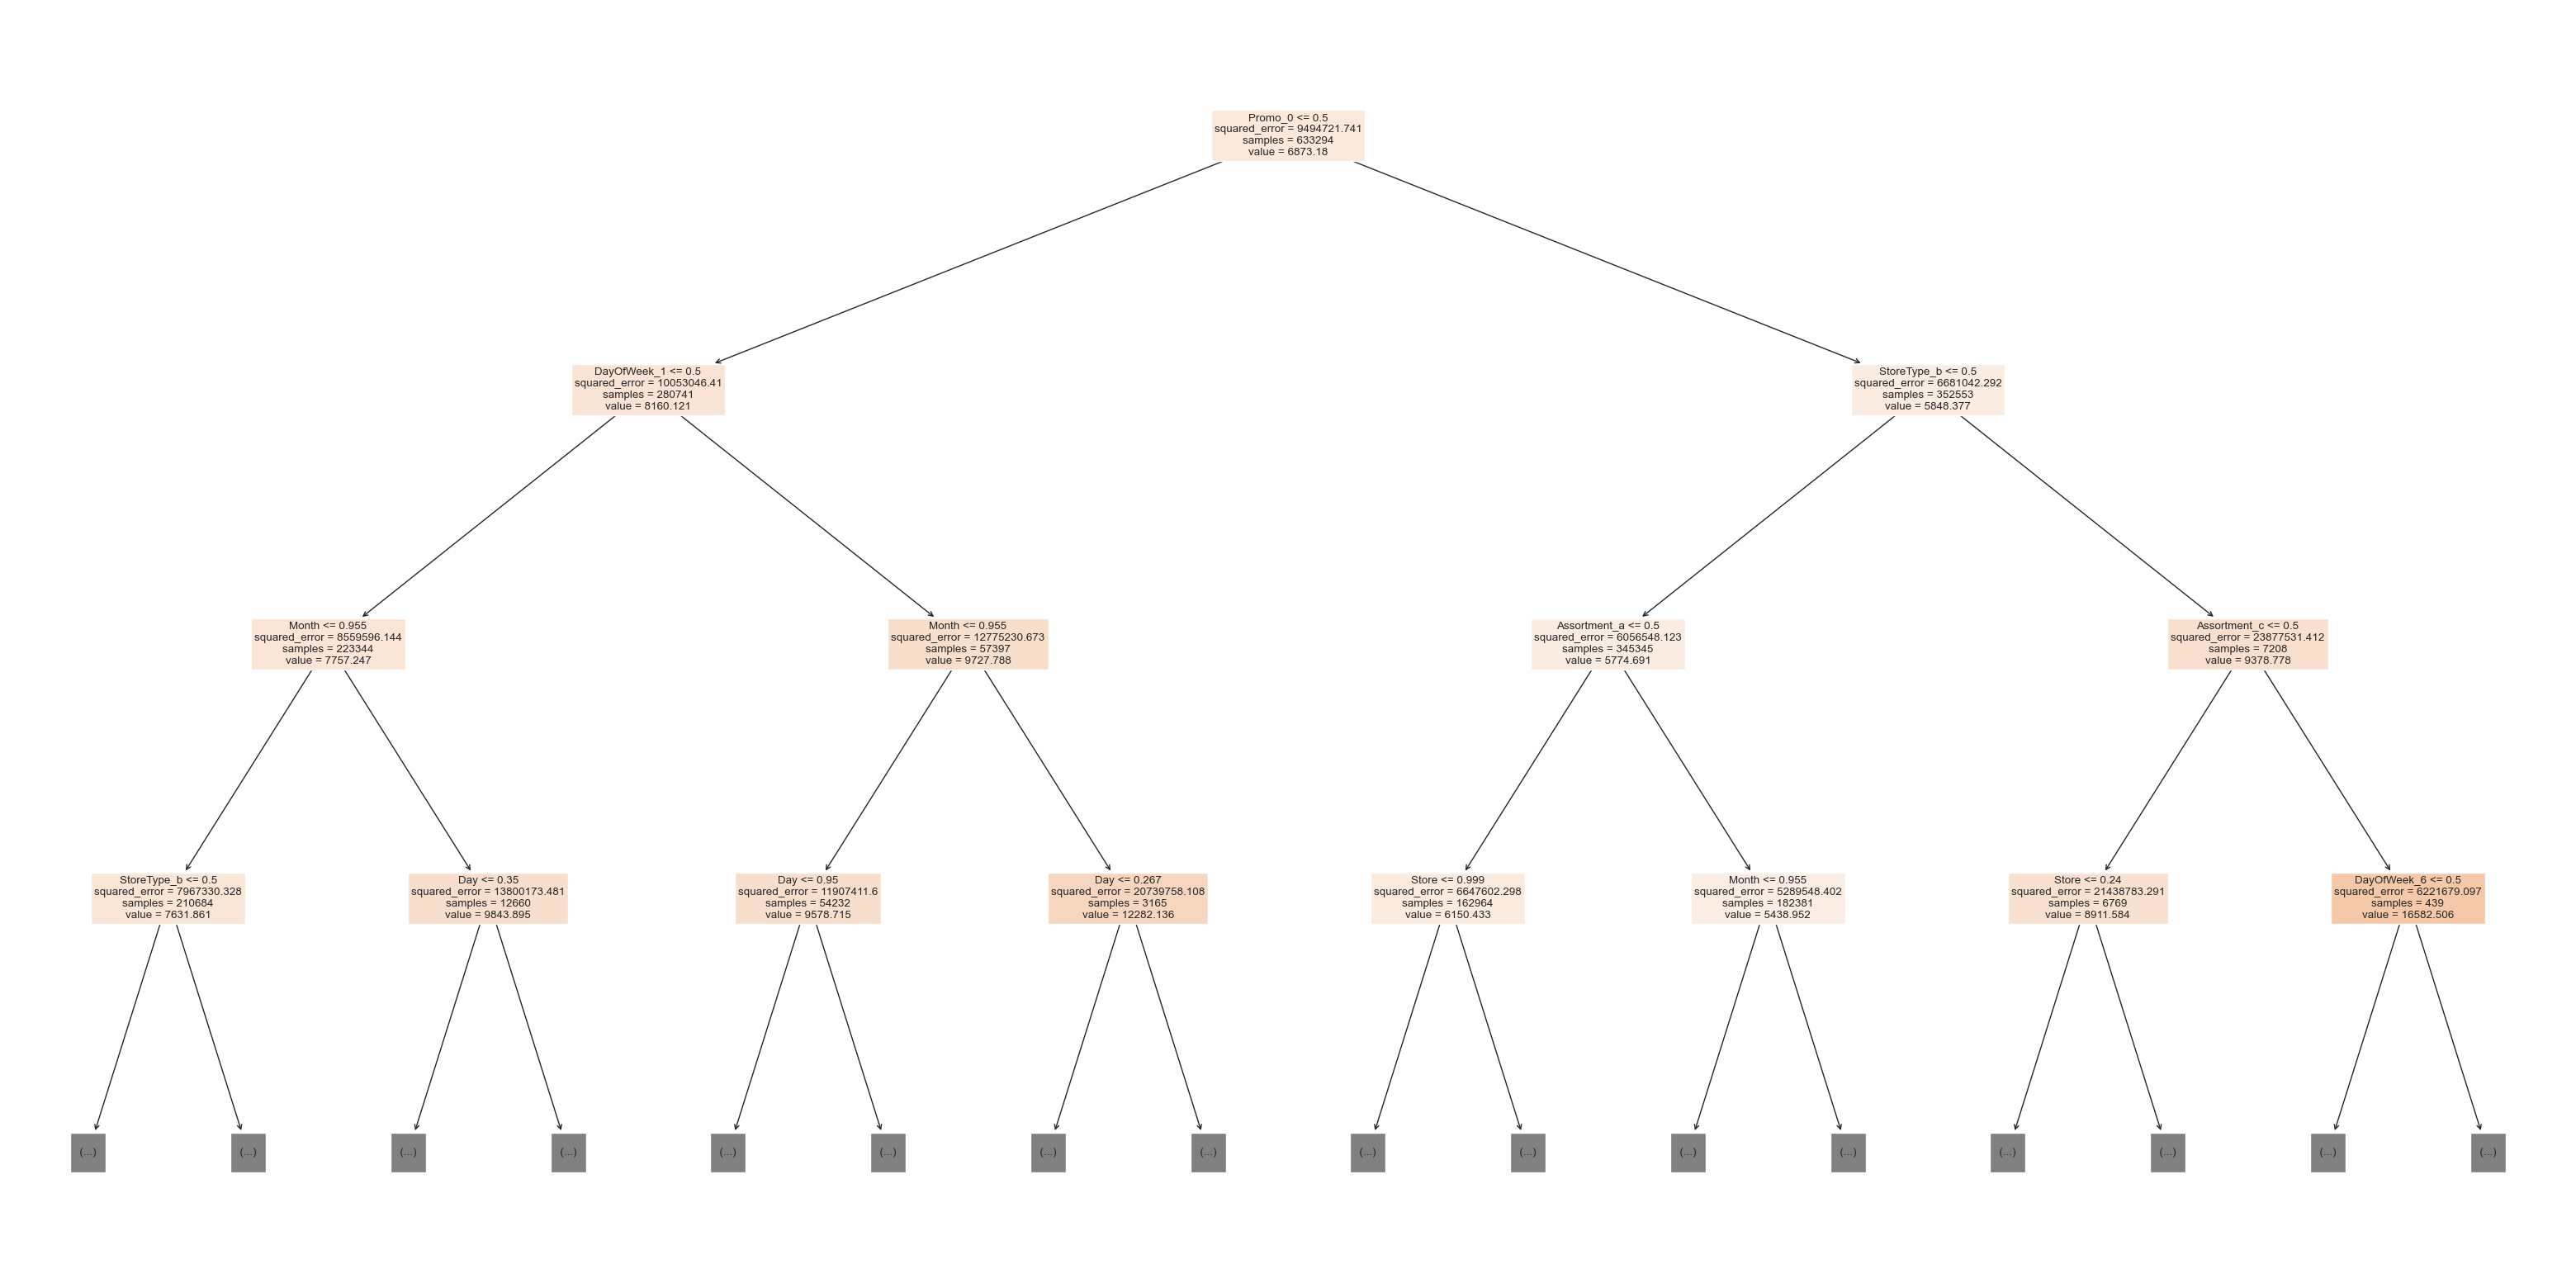

In [138]:
plt.figure(figsize=(40, 20))
plot_tree(tree, max_depth=3, filled=True, feature_names=numeric_cols+encoded_cols);

In [139]:
%%time
rf = RandomForestRegressor(random_state=42, n_jobs=-1)
try_model(rf)

CPU times: total: 8min 8s
Wall time: 48.9 s


(474.9198974666898, 1371.7321923469985)

## Step 7 - Experiment and combine results from multiple strategies

In general, the following strategies can be used to improve the performance of a model:

- Gather more data. A greater amount of data can let you learn more relationships and generalize the model better.
- Include more features. The more relevant the features for predicting the target, the better the model gets.
- Tune the hyperparameters of the model. Increase the capacity of the model while ensuring that it doesn't overfit.
- Look at the specific examples where the model make incorrect or bad predictions and gather some insights
- Try strategies like grid search for hyperparameter optimization and K-fold cross validation
- Combine results from different types of models (ensembling), or train another model using their results.

### Hyperparameter Optimization & Grid Search

You can tune hyperparameters manually, our use an automated tuning strategy like random search or Grid search. Follow this tutorial for hyperparameter tuning using Grid search: https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

 ### K-Fold Cross Validation


Here's what K-fold cross validation looks like visually ([source](https://vitalflux.com/k-fold-cross-validation-python-example/)):

<img src="https://i.imgur.com/MxnzWwT.png" width="480">

Follow this tutorial to apply K-fold cross validation: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

### Ensembling and Stacking

Ensembling refers to combining the results of multiple models. Here's what ensembling looks like visually([source](https://www.kdnuggets.com/2019/01/ensemble-learning-5-main-approaches.html)):

<img src="https://i.imgur.com/rrOKVEd.png" width="480">


Stacking is a more advanced version of ensembling, where we train another model using the results from multiple models. Here's what stacking looks like visually ([source](https://medium.com/ml-research-lab/stacking-ensemble-meta-algorithms-for-improve-predictions-f4b4cf3b9237)): 

<img src="https://i.imgur.com/VVzCWNB.png" width="400">

Here's a tutorial on stacking: https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/

## Step 8 - Interpret models, study individual predictions & present your findings

### Feature Importance

You'll need to explain why your model returns a particular result. Most scikit-learn models offer some kind of "feature importance" score.

In [149]:
X_train.columns

Index(['Store', 'Day', 'Month', 'Year', 'DayOfWeek_1', 'DayOfWeek_2',
       'DayOfWeek_3', 'DayOfWeek_4', 'DayOfWeek_5', 'DayOfWeek_6',
       'DayOfWeek_7', 'Promo_0', 'Promo_1', 'StateHoliday_0', 'StateHoliday_a',
       'StateHoliday_b', 'StateHoliday_c', 'StoreType_a', 'StoreType_b',
       'StoreType_c', 'StoreType_d', 'Assortment_a', 'Assortment_b',
       'Assortment_c'],
      dtype='object')

In [150]:
rf.feature_importances_

array([6.07412101e-01, 4.88393196e-02, 4.71254150e-02, 9.30282826e-03,
       3.36941035e-02, 4.40591456e-03, 2.43735761e-03, 2.11467096e-03,
       5.71418981e-03, 6.96554452e-03, 4.47739863e-03, 5.83469269e-02,
       8.05201285e-02, 1.18767484e-03, 2.11472202e-04, 2.45172539e-05,
       1.88388455e-05, 1.38995265e-02, 2.25678813e-02, 1.04169805e-02,
       1.39945667e-02, 8.34303630e-03, 5.50125164e-03, 1.24783549e-02])

In [151]:
importance_df = pd.DataFrame({ 
    'feature': numeric_cols+encoded_cols, 
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)
importance_df.head(10)

,feature,importance
0,Store,0.607412
12,Promo_1,0.080520
11,Promo_0,0.058347
1,Day,0.048839
2,Month,0.047125
4,DayOfWeek_1,0.033694
18,StoreType_b,0.022568
20,StoreType_d,0.013995
17,StoreType_a,0.013900
23,Assortment_c,0.012478


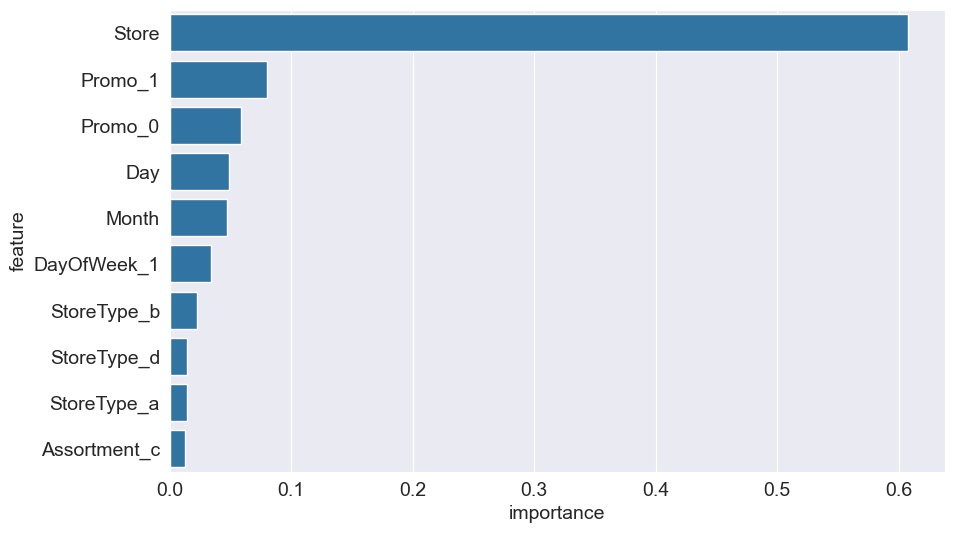

In [152]:
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

### Looking at individual predictions

In [154]:
def predict_input(model, single_input):
    if single_input['Open'] == 0:
        return 0.
    input_df = pd.DataFrame([single_input])
    input_df['Date'] = pd.to_datetime(input_df.Date)
    input_df['Day'] = input_df.Date.dt.day
    input_df['Month'] = input_df.Date.dt.month
    input_df['Year'] = input_df.Date.dt.year
    input_df[numeric_cols] = imputer.transform(input_df[numeric_cols])
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    return pred

In [155]:
sample_input = {'Id': 1,
 'Store': 1,
 'DayOfWeek': 1,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': np.nan,
 'Promo2SinceYear': np.nan,
 'PromoInterval': np.nan}

sample_input

{'Id': 1,
 'Store': 1,
 'DayOfWeek': 1,
 'Date': '2015-09-17 00:00:00',
 'Open': 1.0,
 'Promo': 1,
 'StateHoliday': '0',
 'SchoolHoliday': 0,
 'StoreType': 'c',
 'Assortment': 'a',
 'CompetitionDistance': 1270.0,
 'CompetitionOpenSinceMonth': 9.0,
 'CompetitionOpenSinceYear': 2008.0,
 'Promo2': 0,
 'Promo2SinceWeek': nan,
 'Promo2SinceYear': nan,
 'PromoInterval': nan}

In [156]:
predict_input(rf, sample_input)

5411.55

### Presenting your results

* Create a presentation for non-technical stakeholders
* Understand your audience - figure out what they care about most
* Avoid showing any code or technical jargon, include visualizations
* Focus on metrics that are relevant for the business
* Talk about feature importance and how to interpret results
* Explain the strengths and limitations of the model
* Explain how the model can be improved over time

### Model Deployment

At this point, the model can be handed over to a software developer / ML engineer who can put the model into production, as part of an existing software system. It's important to monitor the results of the model, and make improvements from time to time.

Check out this tutorial on how to deploy a model to the Heroku platform using the Flask framework: https://towardsdatascience.com/create-an-api-to-deploy-machine-learning-models-using-flask-and-heroku-67a011800c50

## Summary and References

![](https://i.imgur.com/kKdAALX.png)

Here's the summary of the step-by-step process you should follow to approach any machine learning problem:

1. Understand the business requirements and the nature of the available data.
2. Classify the problem as supervised/unsupervised and regression/classification.
3. Download, clean & explore the data and create new features that may improve models.
4. Create training/test/validation sets and prepare the data for training ML models.
5. Create a quick & easy baseline model to evaluate and benchmark future models.
5. Pick a modeling strategy, train a model, and tune hyperparameters to achieve optimal fit.
6. Experiment and combine results from multiple strategies to get a better overall result.
7. Interpret models, study individual predictions, and present your findings. 


Check out the following resources to learn more:

- https://vas3k.com/blog/machine_learning/
- https://github.com/abhishekkrthakur/approachingalmost
- https://scikit-learn.org/stable/
- https://github.com/microsoft/ML-For-Beginners